## Week 6: Dimensionality Reduction (PCA) and Model Validation

**(1a) Load the data file 'data1.csv' and visualize the data using a scatter plot.**

In [35]:
# Write Code 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'Scatter Plot')

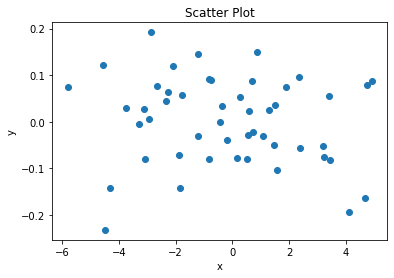

In [5]:
data = pd.read_csv("data1.csv")
data_arr = np.array(data)
X = data_arr[:,0]
y = data_arr[:,1]
plt.scatter(X,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot")

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [10]:
# Write Code here'p77op'
dropping_1=np.sum(data.iloc[:,0]**2)
dropping_2=np.sum(data.iloc[:,1]**2)
print("Loss on dropping feature 1: {}".format(dropping_1))
print("Loss on dropping feature 2: {}".format(dropping_2))
print("\n")
print("Feature 2 dropped due to lower loss")

Loss on dropping feature 1: 348.57541979315033
Loss on dropping feature 2: 0.4189623480011352


Feature 2 dropped due to lower loss


7**(1c) Visualize the approximated data and compare it with the original data using scatter plot**

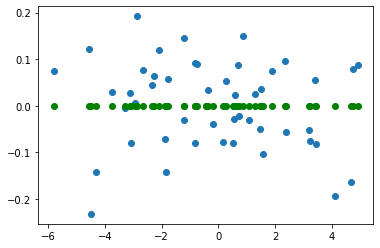

In [14]:
# Write Code here
plt.scatter(X,y)
plt.scatter(X,np.zeros(len(X)),color='g')
plt.show()

**(2a) Load the data file 'data2.csv'.**

In [15]:
# Write Code here
df = pd.read_csv("./data2.csv",header=None)
df.head()

,0,1,2,3
0,0.007589,-8.886696,-12.316361,-0.036092
1,-1.461927,3.977425,-17.784232,0.075197
2,-0.891625,-7.426320,25.122113,-0.150440
3,1.057471,4.184783,39.927021,0.068328
4,0.147645,-0.309380,33.502600,-0.125913


**(2c) Plot the minimum representation loss as a function of the number of features used for representation. Vary the number of features from 0 to 3**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

Order of features in increasing order of significance:['x4', 'x1', 'x2', 'x3']


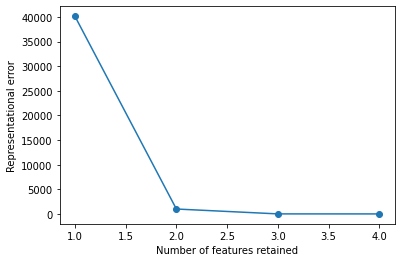

In [17]:
drop = []
feat = ['x1','x2','x3','x4']
for i in range(4):
    loss = (df.iloc[:,i]**2).sum().sum()
    drop.append(loss)
index=np.argsort(drop)
drop_sorted = np.sort(drop)
feature_imp = [feat[i] for i in index]
print("Order of features in increasing order of significance:{}".format(feature_imp))

loss = []
for i in range(4):
    loss.append(np.sum(drop_sorted[:i]))

#plotting
plt.plot(np.arange(4,0,step=-1),loss)
plt.scatter(np.arange(4,0,step=-1),loss)
plt.xlabel("Number of features retained")
plt.ylabel("Representational error")
plt.show()

**(2d) Compute the covariance matrix of the data. Give your observations between the values in covariance matrix and feature importance obtained in (2c).**

In [18]:
# Write code here
print(np.cov(df.values.T))

[[ 9.87196296e-01 -5.71788428e-02 -1.40990871e-01  3.05657061e-03]
 [-5.71788428e-02  3.91821903e+01  1.16676059e-01 -7.77027357e-03]
 [-1.40990871e-01  1.16676059e-01  1.00898980e+03  5.58349417e-02]
 [ 3.05657061e-03 -7.77027357e-03  5.58349417e-02  5.09299247e-03]]


We can see that x4 has the least variance hence it can be termed as least important amongst all other features. After it comes x1 with second least variance. Then x2 and x3. Hence we can say that features with very less variance , removing them will give least representation loss.

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of data**

In [19]:
# Write code here
df = pd.read_csv("./data3.csv",header=None)
df.head()

,0,1
0,-2.173608,-2.191730
1,1.634760,1.715328
2,-0.461201,-0.587819
3,-0.760849,-0.966327
4,-1.387257,-1.554868


In [24]:
#Covariance matrix C
print(np.cov(df.values.T))

[[3.59416569 3.61756379]
 [3.61756379 3.65805865]]


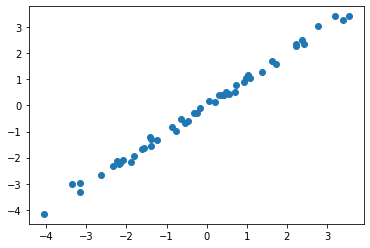

In [25]:
# Write code here
plt.scatter(df[0],df[1])
plt.show()  

**(3c) Apply PCA to transform data by retaining only 1 PC. Now, visualize the data points in transformed 1-dimensional space**

Uncorrelated covariance matrix:
[[7.2438071  0.00847204]
 [0.00847204 0.00841725]]
Rotation matrix:
[[ 0.7048089  -0.70939722]
 [ 0.70939722  0.7048089 ]]


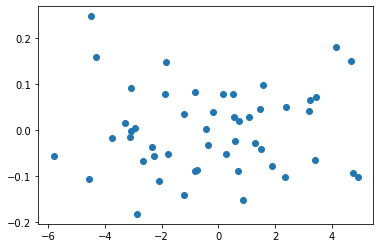

In [27]:
#finding slope
COV = np.cov(df.values.T)
slope = COV[0,1]/COV[0,0]
#For uncorrelating , we need to rotate, finding rotation matrix
angle = np.arctan(slope)
rot_matrix = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
#Rotation the correlation matrix by rot.T*corr_matrix*rot
rot_corr_matrix = np.dot(rot_matrix.T,np.dot(np.cov(df.values.T),rot_matrix))
#Uncorrleated covariance matrix
print("Uncorrelated covariance matrix:\n{}".format(rot_corr_matrix))
#Rotation matrix
print("Rotation matrix:\n{}".format(rot_matrix))   

X_rot = np.dot(df.values,rot_matrix)
plt.scatter(X_rot[:,0],X_rot[:,1])
plt.show()

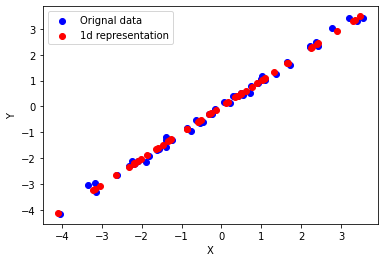

In [28]:
#Taking feature 1 of X_rot as it minimize representation loss and converting Y to 0 for plotting purpose
X_1d=X_rot.copy()
#Only 1st feature considered
X_1d[:,1] = 0
#Reversing the rotation
X_1d_rot = np.dot(X_1d,rot_matrix.T)
#Plotting the rotated version
plt.scatter(df[0],df[1],color='blue')
plt.scatter(X_1d_rot[:,0],X_1d_rot[:,1],color='red')
plt.legend(["Orignal data","1d representation"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**(3d) Compute the representational loss (with respect to the original data).**

**(3e) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [30]:
#(3e)Representation loss between data and data_1d_rotat
print("Representation loss with transformation:{}".format(np.sum(np.sum((df-X_1d_rot)**2))))
#(3f)Representation without any transformation
#Removing feature 1
print("Representation loss without transformation after removing feature1:{}".format(np.sum((df[0])**2)))
#Removing feature 2
print("Representation loss without transformation after removing feature2:{}".format(np.sum((df[1])**2)))

Representation loss with transformation:0.41254962634962794
Representation loss without transformation after removing feature1:177.66749559601547
Representation loss without transformation after removing feature2:180.85513738058907



If features are correlated then we cant remove features directly without transformation as it will give huge representation loss. On decorrelating the features and removing one features gives best representation. We confirm this by the loss with and without transformation

### Application of PCA on real dataset

**(4a) Load the human face data set from sklearn (fetch_lfw_people).**

In [32]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

**(4b) Apply PCA on the faces data (sklearn can be used). Take the top 150 features from PCA. Reconstruct the images with the these 150 features and visualise them. Give your observations.**

<Figure size 432x288 with 0 Axes>

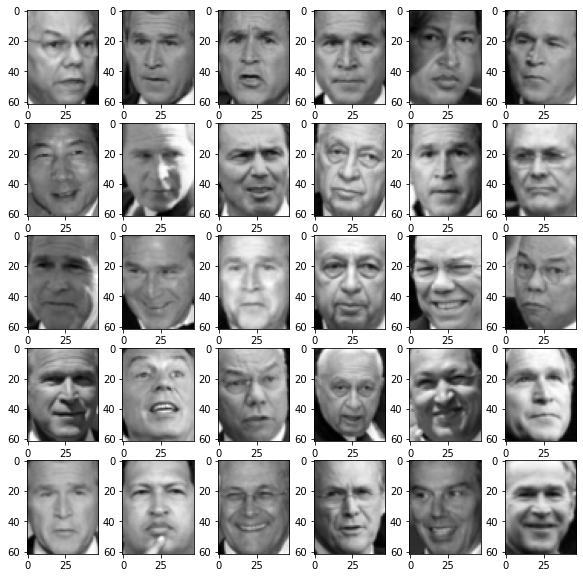

In [33]:
# Write your code here
plt.gray()
fig = plt.figure(figsize = [10,10])
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(faces.images[i])

<Figure size 432x288 with 0 Axes>

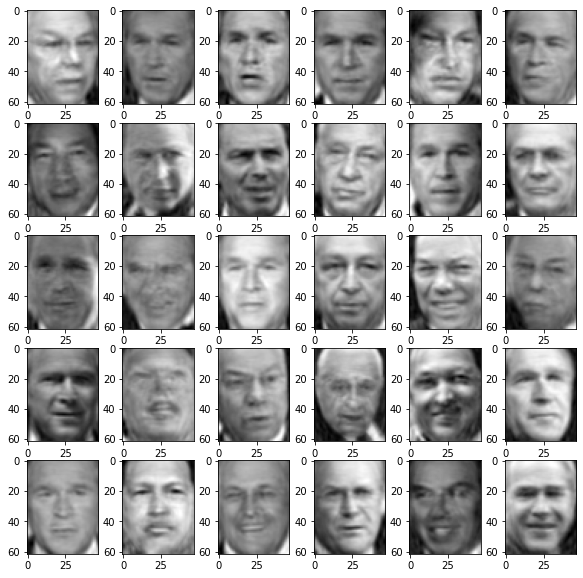

In [36]:
#Applying PCA 
pca_model=PCA(n_components=150).fit(faces.data)
top_components=pca_model.components_
#Reconstruction images
recons_data=np.dot(np.dot(faces.data,top_components.T),top_components)
#reshaping into images
recons_images=np.reshape(recons_data,np.shape(faces.images))

#Visualizing images
plt.gray()
fig = plt.figure(figsize = [10,10])
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(recons_images[i])

### 5) Cross validation to select parameters for Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$


Perform ridge rigression using gradient descent on the data 4 provided. (You can use sklearn)

Try to fit the data with polynomial of degree 3 and 

- For $\lambda$ choose from = [10,100,1000]
- choose learning rate (here it is $\alpha$)= [ 0.01,0.001,0.0001]
- max_iters = 1000

Choose the best combination of $\lambda$ and $\alpha$ using 5-fold cross validation on the dataset provided and report the same.


In [129]:
# Write your code here
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings("ignore") 

In [130]:
data = np.load("data4.npz")
lamdas = [10,100,1000]
alphas = [0.01,0.001,0.00001]

In [131]:
X = data['X_train']
y = data['y_train']

In [132]:
X = X[:,np.newaxis]
Y = y[:,np.newaxis]

In [133]:
def kfold(lamda,alp):
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    counter = 0
    mse_sum = 0
    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        x_poly = poly.fit_transform(X_train.reshape(-1,1))
        x_poly = x_poly[:,1:]
        x_poly_test = poly.fit_transform(X_test.reshape(-1,1))
        x_poly_test = x_poly_test[:,1:]
        reg_ridge = SGDRegressor(alpha = lamda, max_iter=1000, learning_rate='constant',eta0=alp).fit(x_poly, y_train)
        y_hat = reg_ridge.predict(x_poly_test)
        mse = mean_squared_error(y_test,y_hat)
        mse_sum += mse
        counter += 1
    mse_avg = mse_sum/counter
    return mse_avg

In [134]:
errors = []
for lamda in lamdas:
    for alp in alphas:
        error = kfold(lamda,alp)
        errors.append(error)

In [135]:
errors

[1.797266455554515e+27,
 8.391166926663993e+23,
 289.99371061716676,
 5.7363168740990155e+25,
 4.646422949069172e+24,
 679.231463499518,
 5.873300512133582e+24,
 4095.522882974348,
 941.7226169215721]

Based on cross validation error, the lowest one (323.26) corresponds to $\lambda = 10, \; \alpha = 0.0001$